# Визуальный анализ

*Все задания выполняются только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`, `plotly`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести визуальный анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных композиций.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

> **NB!** *Для выполнения задания возьмите 30 тысяч случайных строк из датасета.*

# Часть 1

In [1]:
%load_ext rpy2.ipython

## Задание 1

Покажите, какие характеристики музыки коррелируют между собой. Сделайте выводы о корреляциях.

In [2]:
%%R
library(dplyr)
# формирование даных
data_frame <- read.csv("https://raw.githubusercontent.com/IYunet/VIM-2022/main/2%20task/music_genre.csv", header = TRUE)
data_frame <- filter(data_frame, data_frame$duration_ms > 0)
set.seed(2002)
data_frame <- sample_n(data_frame, 30000)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
%%R
install.packages("corrplot")
install.packages("sm") 
library(corrplot)

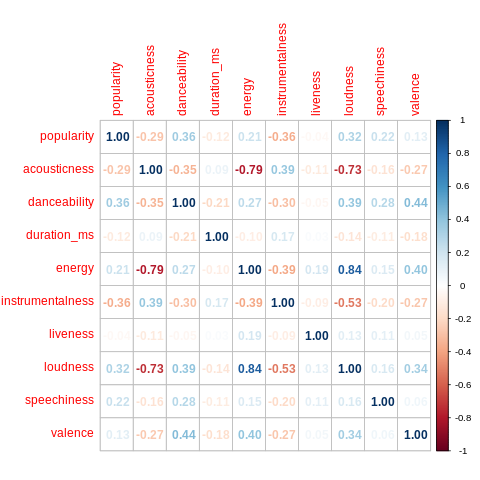

In [4]:
%%R
corrplot(cor(data_frame[c('popularity','acousticness','danceability','duration_ms', 'energy', 'instrumentalness', 
                          'liveness', 'loudness', 'speechiness', 'valence')]), method = 'number')

Наибольшая корреляция между energy и loudness 0.84, наименьшая корреляция между energy и acousticness - 0.79

## Задание 2

Покажите на диаграмме разброса три пары признаков, имеющих наибольшую отрицательную корреляцию.

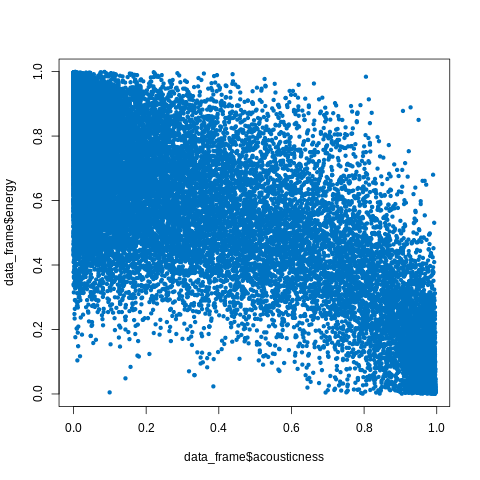

In [5]:
%%R 
plot(data_frame$acousticness, data_frame$energy, pch=20, col = "#0073C2FF")

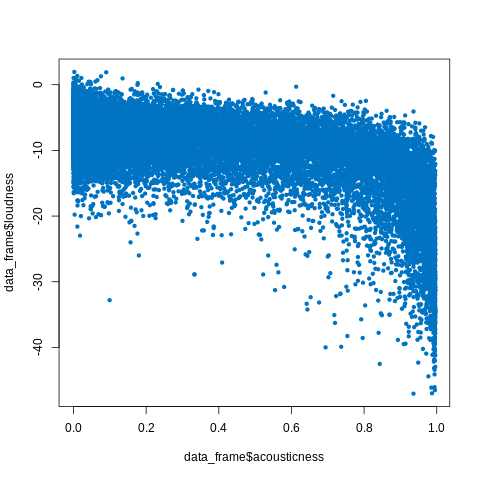

In [6]:
%%R 
plot(data_frame$acousticness, data_frame$loudness, pch=20, col = "#0073C2FF")

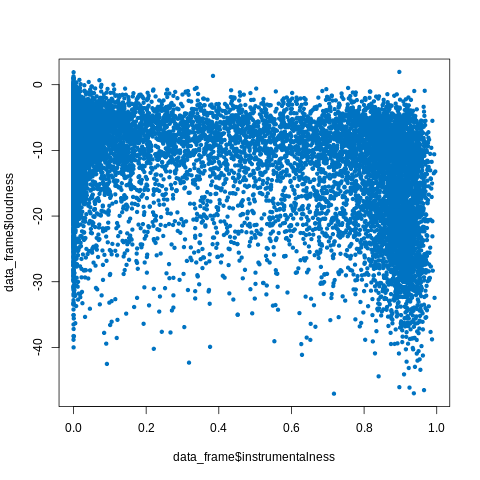

In [7]:
%%R 
plot(data_frame$instrumentalness, data_frame$loudness, pch=20, col = "#0073C2FF")

## Задание 3

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.

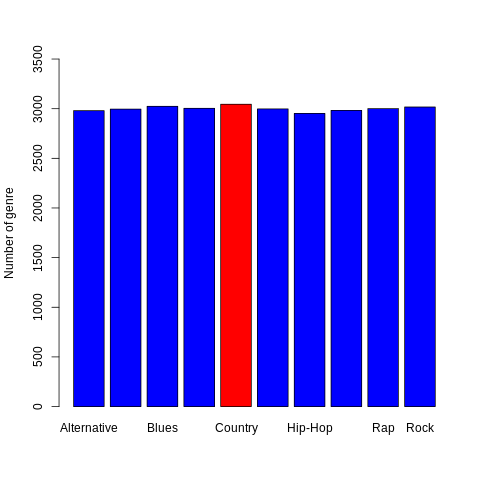

In [8]:
%%R
count_by_genrge <- data_frame %>% group_by(music_genre) %>% count(music_genre)
max1 <- max(count_by_genrge$n)

col1 <- c()
for (i in 1:length(count_by_genrge$n)){    
    if (count_by_genrge$n[i] == max1){
        col1 <- append(col1,'red', i)  
    }
    else { col1 <- append(col1,'blue',i ) }
} 

barplot(count_by_genrge$n, names.arg=count_by_genrge$music_genre, col=col1, ylab="Number of genre", ylim=c(0,3500)) #костыль 


## Задание 4

Для топ-3 жанров покажите на круговой диаграмме с группировкой топ-3 самых популярных исполнителей. Диаграмма должна быть одна.

In [ ]:
%%R
top_3_genre <- data_frame %>% group_by(music_genre) %>% summarise(sum_genre = sum(popularity) )
top_3_genre <- head(top_3_genre[order(top_3_genre$sum_genre, decreasing=TRUE),], n = 3)
music_with_top_3_genre <- filter(data_frame,  music_genre %in% (top_3_genre$music_genre) & artist_name != 'empty_field' )
# сортировка артистов по жанрам

count_by_artis_rap <- filter(music_with_top_3_genre, music_genre == "Rap")  
count_by_artis_rap <- count_by_artis_rap %>% group_by(artist_name, music_genre) %>% summarise(popularity = sum(popularity))

count_by_artis_rock <- filter(music_with_top_3_genre, music_genre == "Rock") 
count_by_artis_rock <- count_by_artis_rock %>% group_by(artist_name, music_genre) %>% summarise(popularity = sum(popularity))

count_by_artis_hip <- filter(music_with_top_3_genre, music_genre == "Hip-Hop") 
count_by_artis_hip <- count_by_artis_hip %>% group_by(artist_name, music_genre) %>% summarise(popularity = sum(popularity))

# топ 3 артиста по жанру
top_3_artis_rap <- head(count_by_artis_rap[order(count_by_artis_rap$popularity, decreasing=TRUE),], n=3)
top_3_artis_rock <- head(count_by_artis_rock[order(count_by_artis_rock$popularity, decreasing=TRUE),], n=3)
top_3_artis_hip <- head(count_by_artis_hip[order(count_by_artis_hip$popularity, decreasing=TRUE),], n=3)

one_table <- rbind(top_3_artis_rap, top_3_artis_rock)
one_table <- rbind(one_table, top_3_artis_hip)



In [ ]:
%%R
install.packages("tidyverse")
install.packages("sunburstR")


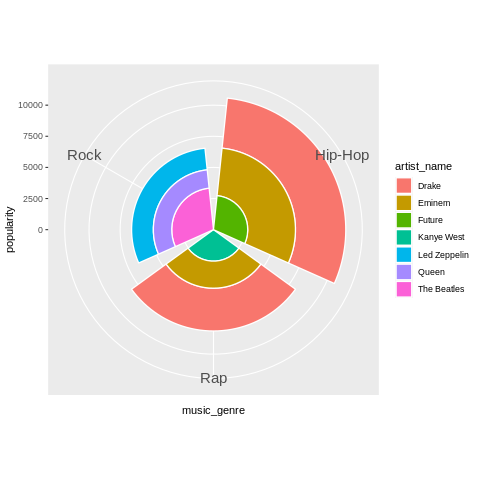

In [451]:
%%R
ggplot() +
  geom_bar(data=one_table, aes(x=music_genre, y=popularity, fill=artist_name),
 color='white', position='stack', stat='identity', size=0.6) + 
   coord_polar() +
   theme(plot.title = element_text(hjust = 20), axis.text.x=element_text(angle=0, hjust=20, size=15), panel.spacing.x=unit(20, "lines")) 


## Задание 5

На вертикальной столбиковой диаграмме для самого популярного и самого непопулярного жанров покажите средние значения по характеристикам. На одной диаграмме покажите 5 характеристик, в которых разница средних значений максимальна. На второй - в которых разница средних значений минимальна.

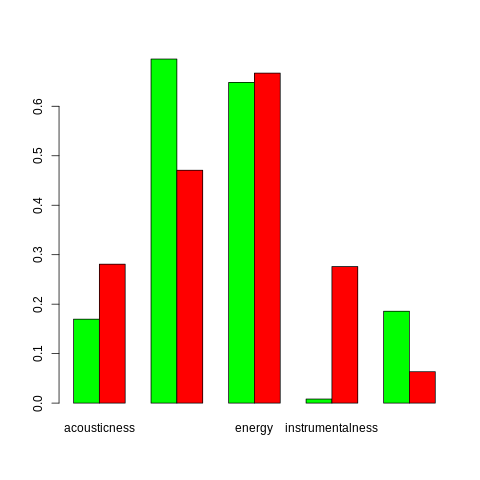

In [195]:
%%R
# самый поплярный и самый непопулярный жанр
most_popular_genre <- data_frame %>% group_by(music_genre) %>% summarise(popularity = sum(popularity))
most_popular_genre <- head(most_popular_genre[order(most_popular_genre$popularity, decreasing=TRUE),], n=1)

most_non_popular_genre <- data_frame %>% group_by(music_genre) %>% summarise(popularity = sum(popularity))
most_non_popular_genre <- tail(most_non_popular_genre[order(most_non_popular_genre$popularity, decreasing=TRUE),], n=1)

# подсчет среднего
mean_popular <- filter(data_frame, music_genre %in% most_popular_genre$music_genre)
drops <- c("music_genre", "duration_ms", "instance_id", "popularity","loudness", "artist_name", "track_name", "obtained_date", "key", "mode")
mean_popular <- mean_popular[ , !(names(mean_popular) %in% drops)]
mean_popular <- colMeans(mean_popular[sapply(mean_popular, is.numeric)])

mean_not_popular <- filter(data_frame, music_genre %in% most_non_popular_genre$music_genre)
mean_not_popular <- mean_not_popular[ , !(names(mean_not_popular) %in% drops)]
mean_not_popular <- colMeans(mean_not_popular[sapply(mean_not_popular, is.numeric)])

diff <- abs(mean_popular - mean_not_popular)
diff <- as.data.frame(t(diff))
diff <- as.data.frame(t(diff))

# топ 5 разниц
max_5_diff <- head(diff[order(diff$V1, decreasing=TRUE),], n=5)
min_5_diff <- tail(diff[order(diff$V1, decreasing=TRUE),], n=5)

max_5_diff <- filter(diff, V1 %in% max_5_diff)
min_5_diff <- filter(diff, V1 %in% min_5_diff)

max_5_diff$music_genre <- rownames(max_5_diff) 
min_5_diff$music_genre <- rownames(min_5_diff) 

# транспонирование 
mean_popular <- as.data.frame(t(mean_popular))
mean_popular <- as.data.frame(t(mean_popular))
mean_popular$music_genre <- rownames(mean_popular) 

mean_not_popular <- as.data.frame(t(mean_not_popular))
mean_not_popular <- as.data.frame(t(mean_not_popular))
mean_not_popular$music_genre <- rownames(mean_not_popular) 

# наложение условий
filter_for_t1 <- filter(mean_popular, music_genre %in% max_5_diff$music_genre)
filter_for_t2 <- filter(mean_not_popular, music_genre %in% max_5_diff$music_genre)

barplot(rbind(filter_for_t1$V1,filter_for_t2$V1),beside=T, names.arg = filter_for_t1$music_genre, col=c('green','red'),  )


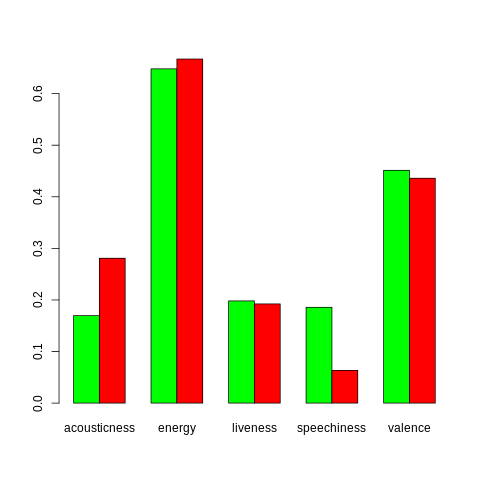

In [194]:
%%R
filter_for_t1 <- filter(mean_popular, music_genre %in% min_5_diff$music_genre)
filter_for_t2 <- filter(mean_not_popular, music_genre %in% min_5_diff$music_genre)

barplot(rbind(filter_for_t1$V1,filter_for_t2$V1),beside=T, names.arg = filter_for_t1$music_genre, col=c('green','red'),  )

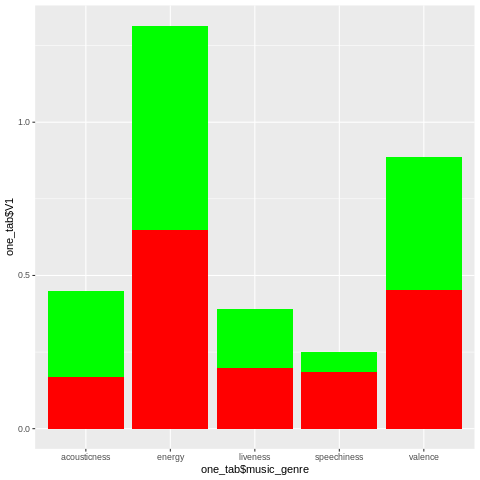

In [197]:
%%R
# другой способ
filter_for_t1 <- filter(mean_popular, music_genre %in% max_5_diff$music_genre)
filter_for_t2 <- filter(mean_not_popular, music_genre %in% max_5_diff$music_genre)

one_tab <- rbind(filter_for_t1, filter_for_t2)

col2 <- c('red','red','red','red','red', 'green', 'green', 'green', 'green', 'green')

library(ggplot2)

df <- as.data.frame(one_tab)

ggplot(data = df, aes(x = one_tab$music_genre, y = one_tab$V1)) +
       geom_bar(stat = "identity", fill = col2)





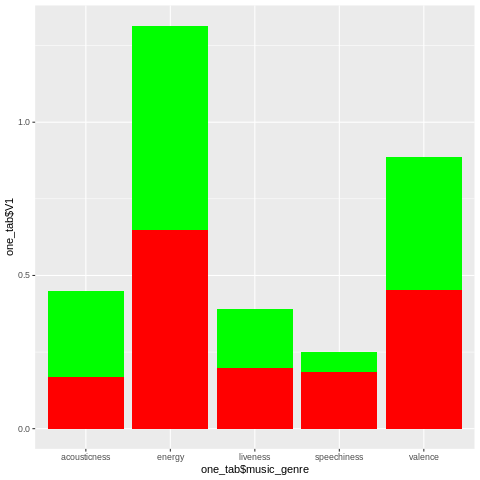

In [198]:
%%R
# другой способ
filter_for_t1 <- filter(mean_popular, music_genre %in% min_5_diff$music_genre)
filter_for_t2 <- filter(mean_not_popular, music_genre %in% min_5_diff$music_genre)

one_tab <- rbind(filter_for_t1, filter_for_t2)

col2 <- c('red','red','red','red','red', 'green', 'green', 'green', 'green', 'green')

library(ggplot2)

df <- as.data.frame(one_tab)

ggplot(data = df, aes(x = one_tab$music_genre, y = one_tab$V1)) +
       geom_bar(stat = "identity", fill = col2)

## Задание 6

Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая", "средняя", "длинная". Значения для каждой категории определите, исследовав данные в столбце `duration_ms`. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.

In [229]:
%%R
mean(data_frame$duration_ms) # medium

[1] 246509.5


In [230]:
%%R
max(data_frame$duration_ms) # long

[1] 4830606


In [236]:
%%R
min(data_frame$duration_ms) # short

[1] 15509


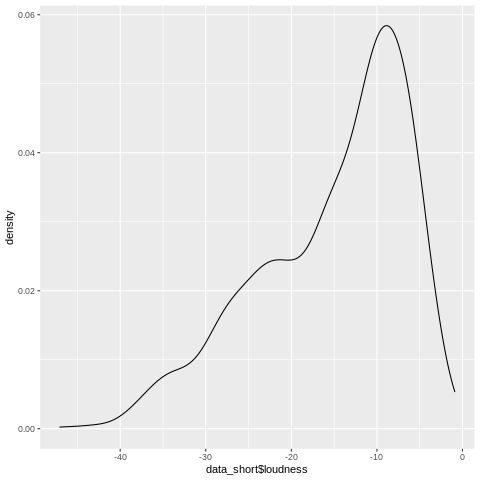

In [291]:
%%R
# short <= 120000 
# 120000 < medium <= 365000
# long > 365000

data_frame_new <- data.frame(data_frame)

data_frame_new <- data_frame_new %>% mutate(track_duration = case_when(
    duration_ms < 120000 ~ 'short',
    duration_ms > 365000 ~ 'long',
    duration_ms >= 120000 & duration_ms <= 365000 ~ 'medium')
)

# наблюдаемые данные
data_short <- filter(data_frame_new, track_duration == 'short')
data_medium <- filter(data_frame_new, track_duration == 'medium')
data_long <- filter(data_frame_new, track_duration == 'long')

# график
ggplot(data_short, aes(x = data_short$loudness)) + 
geom_density(alpha=0.25)

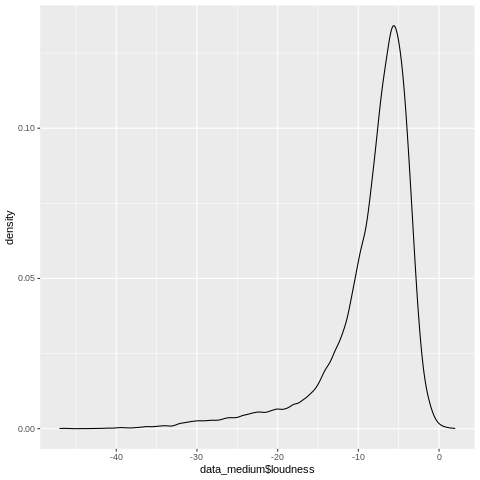

In [279]:
%%R
ggplot(data_medium, aes(x = data_medium$loudness)) + 
geom_density()  

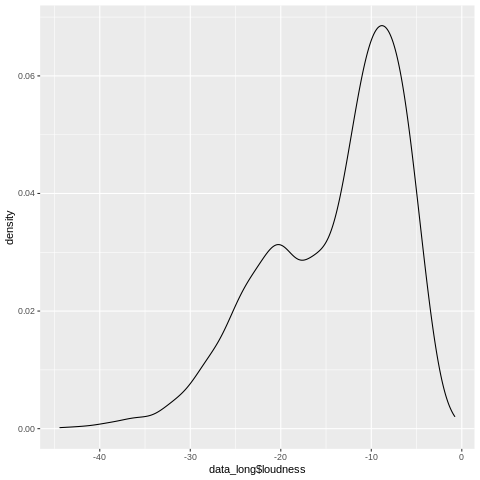

In [280]:
%%R
ggplot(data_long, aes(x = data_long$loudness)) + 
geom_density()  

## Задание 7

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

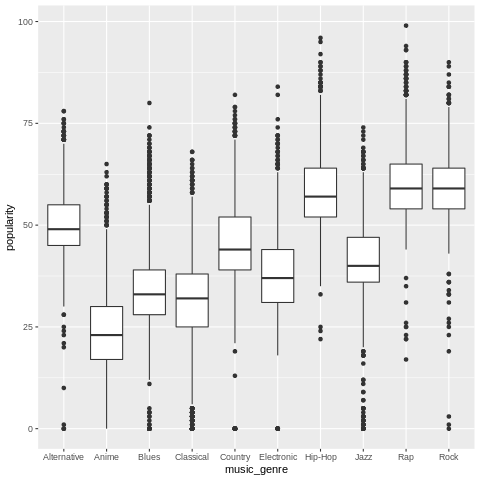

In [228]:
%%R
ggplot(data_frame, aes(x=music_genre, y=popularity)) + 
  geom_boxplot()


Rap, hip-hop, rock почти одинаковы по популярности

## Задание 8

На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности (для длительности используйте новый категориальный столбец, сформированный в задании 6).

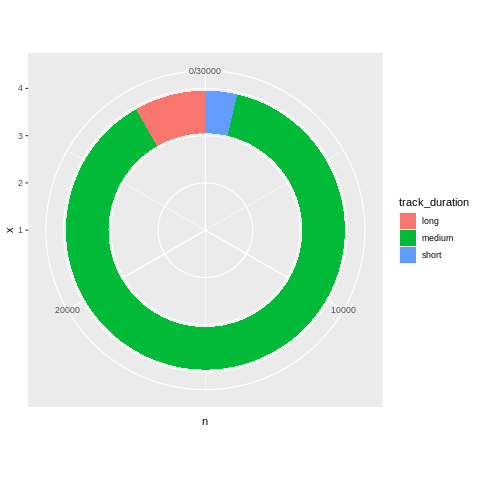

In [332]:
%%R
# отбор данных
data_short <- filter(data_frame_new, track_duration == 'short')
data_short <- data_short %>% group_by(track_duration) %>% count(track_duration)

data_medium <- filter(data_frame_new, track_duration == 'medium')
data_medium <- data_medium %>% group_by(track_duration) %>% count(track_duration)

data_long <- filter(data_frame_new, track_duration == 'long')
data_long <- data_long %>% group_by(track_duration) %>% count(track_duration)

one_tab <- rbind(data_short,data_medium)
one_tab <- rbind(one_tab,data_long)

ggplot(one_tab, aes(x=3.5, y=n, fill=track_duration)) +
     geom_col() +
     coord_polar(theta="y") + 
     xlim(c(1, 4))

# Часть 2 (выполнение на R не обязательно)

Для второй части задания будем использовать другой датасет: о распределении Starbucks по всему миру. Датасет возьмем [отсюда](https://www.kaggle.com/starbucks/store-locations).

## Задание 9

Покажите на карте количество кофеен в каждой строне, данные о которой есть в датасете.

In [ ]:
# PUT YOUR CODE HERE

## Задание 10

Покажите на диаграмме вида treemap количество кофеен в каждой стране каждого региона мира, данные о которых есть в датасете. Страну подписывайте названием, а не ее кодом.

In [ ]:
# PUT YOUR CODE HERE